In [13]:
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

dtfactor = 0.1
integrators = ["None", "implicit_midpoint", "rk4"]

In [14]:
integrator = integrators[0]
filename = 'data/{0}dt{1:.3e}'.format(integrator, dtfactor)
sa = rebound.SimulationArchive(filename+'.sa') 

In [19]:
Nout = len(sa)
sim0 = sa[0]
rebx = reboundx.Extras.from_file(sim0, filename+'.rebx')
gr = rebx.get_effect("gr")
E0 = rebx.gr_hamiltonian(sim0, gr)
Eerr, times = np.zeros(Nout), np.zeros(Nout)
for i, sim in enumerate(sa):
    E = rebx.gr_hamiltonian(sim, gr)
    times[i] = sim.t
    Eerr[i] = np.abs((E-E0)/E0)

ValueError: x and y must have same first dimension, but have shapes (2,) and (5023,)

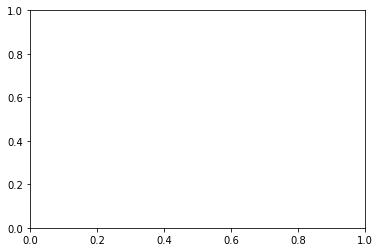

In [28]:
fig, ax = plt.subplots()
ax.plot(times, Eerr, '.')
ax.set_xscale('log')
ax.set_yscale('log')

In [22]:
sa[-1].t/sa[-1].particles[1].P

5021996775.632049